<a href="https://colab.research.google.com/github/dtsri/internship-/blob/main/Islands_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the dataset
islands = pd.read_csv("/content/largest-islands.csv")

In [ ]:
#viewing the data
islands.head()

,region,island,area,countries,climate,rank
0,Africa,Madagascar,591896,Madagascar,tropics,4
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
2,Asia,Sumba,11153,Indonesia,tropics,65
3,Asia,Hainan,34300,China,tropics,37
4,Asia,Taiwan,36198,Taiwan,tropics,36


In [ ]:
#checking the information
islands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     100 non-null    object
 1   island     100 non-null    object
 2   area       100 non-null    int64 
 3   countries  100 non-null    object
 4   climate    100 non-null    object
 5   rank       100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [ ]:
#checking the size of the dataset
islands.shape

(100, 6)

**EDA process**

In [ ]:
#checking null and empty values
islands.isnull().sum()

,0
region,0
island,0
area,0
countries,0
climate,0
rank,0


In [ ]:
#checking the duplicates
islands.duplicated().sum()

np.int64(0)

In [ ]:
#checking the distribution of the data
islands.describe()

,area,rank
count,1.000000e+02,100.000000
mean,9.042785e+04,50.480000
std,2.533592e+05,28.981527
min,5.302000e+03,1.000000
25%,9.282500e+03,25.750000
50%,1.594500e+04,50.500000
75%,6.508350e+04,75.250000
max,2.166086e+06,100.000000


<Axes: >

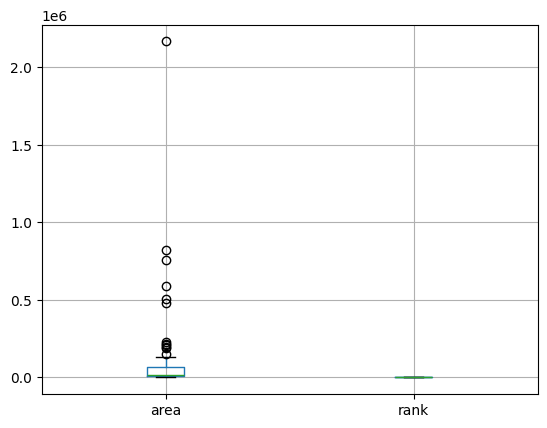

In [ ]:
#Are there outliers in island size or rank?
islands.boxplot()

<Axes: xlabel='area', ylabel='count'>

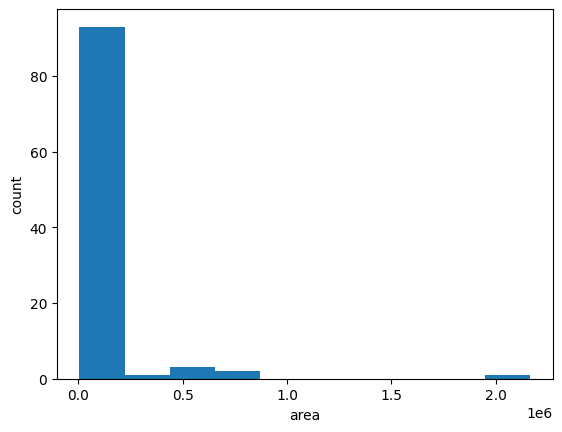

In [ ]:
#What is the distribution of island sizes i.e distribution of area
islands['area'].plot(kind='hist', bins=10, xlabel= 'area', ylabel = 'count')

In [ ]:
# Which regions have the largest islands by area?
islands.groupby('region')['area'].sum().sort_values(ascending = False)

,area
region,
Europe,2724124
Asia,2453727
North America,1730837
Oceania,1246889
Africa,591896
Eurasia,220565
South America,68547
Antarctic,6200


<Axes: xlabel='region', ylabel='area'>

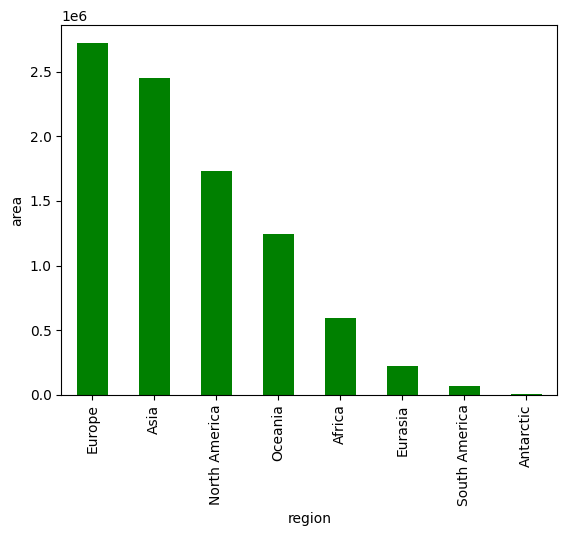

In [ ]:
#plotting the same
islands.groupby('region')['area'].sum().sort_values(ascending = False).plot(kind='bar', xlabel = 'region', ylabel = 'area', color = 'green')

In [ ]:
# What are the top 10 largest islands?
islands.sort_values(by = 'area', ascending = False).head(10)

,region,island,area,countries,climate,rank
41,Europe,Greenland,2166086,Denmark,polar,1
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
0,Africa,Madagascar,591896,Madagascar,tropics,4
75,North America,Baffin Island,507451,Canada,polar,5
28,Asia,Sumatra,480793,Indonesia,tropics,6
27,Asia,Honshu,227898,Japan,temperate,7
69,North America,Victoria Island,217291,Canada,polar,8
43,Europe,Great Britain,209331,United Kingdom,temperate,9
83,North America,Ellesmere (Nunavut),196236,Canada,polar,10


In [ ]:
# largest islands with top ranks - we get the same result
islands.sort_values(by = 'rank', ascending = True).head(10)

,region,island,area,countries,climate,rank
41,Europe,Greenland,2166086,Denmark,polar,1
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
0,Africa,Madagascar,591896,Madagascar,tropics,4
75,North America,Baffin Island,507451,Canada,polar,5
28,Asia,Sumatra,480793,Indonesia,tropics,6
27,Asia,Honshu,227898,Japan,temperate,7
69,North America,Victoria Island,217291,Canada,polar,8
43,Europe,Great Britain,209331,United Kingdom,temperate,9
83,North America,Ellesmere (Nunavut),196236,Canada,polar,10


<Axes: xlabel='island', ylabel='values'>

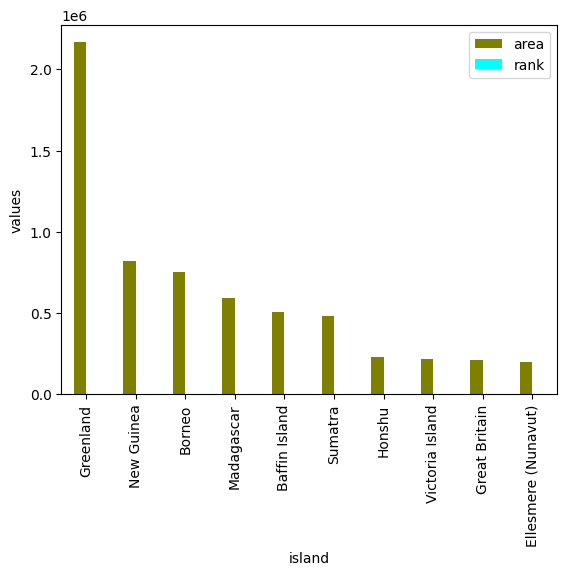

In [ ]:
#plotting the same
islands.sort_values(by = 'area', ascending = False).head(10).plot(kind='bar', x='island', y=['area', 'rank'], color=['olive', 'cyan'], xlabel = 'island', ylabel = 'values')

In [ ]:
#the largest islands have climates either polar or tropics so let's check
# How does climate vary across largest islands?
islands.groupby('climate')['area'].sum().sort_values(ascending = False)

,area
climate,
tropics,3862144
polar,3645900
temperate,1534741


In [ ]:
# now let's check how does climate vary across regions
islands.groupby(['region', 'climate'])['area'].sum().sort_values(ascending = False)

,,area
region,climate,
Europe,polar,2228151
Asia,tropics,2124084
North America,polar,1273584
Oceania,tropics,913419
Africa,tropics,591896
Europe,temperate,479601
Oceania,temperate,333470
Asia,temperate,329643
North America,temperate,240880


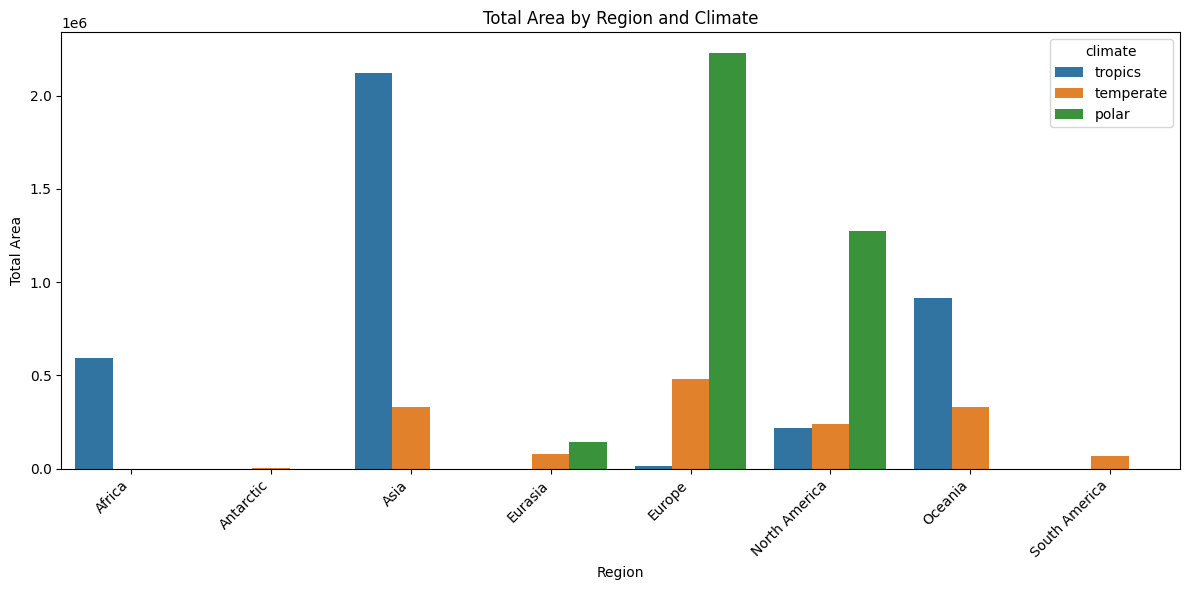

In [ ]:
# plotting the same using a grouped bar chart
grouped_data = islands.groupby(['region', 'climate'])['area'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='region', y='area', hue='climate')
plt.title('Total Area by Region and Climate')
plt.xlabel('Region')
plt.ylabel('Total Area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# from the earlier questions, we came to know that europe and asia are the largest regions and also have the largest islands
# from this part we can also conclude that asia and europe have better climatic conditions for the islands i.e tropics, polar climates which seem to have larger islands

In [ ]:
# Are certain countries associated with more or larger islands?
islands.groupby('countries')['area'].sum().sort_values(ascending = False).head(10)

,area
countries,
Denmark,2173117
Canada,1493195
Indonesia,900783
"Papua New Guinea, Indonesia",821400
"Indonesia, Malaysia, Brunei",755000
Madagascar,591896
Japan,366362
New Zealand,268448
Philippines,265357


In [ ]:
# What is the average, minimum, and maximum area of islands?
islands['area'].describe()

,area
count,1.000000e+02
mean,9.042785e+04
std,2.533592e+05
min,5.302000e+03
25%,9.282500e+03
50%,1.594500e+04
75%,6.508350e+04
max,2.166086e+06


In [ ]:
# Which islands span multiple countries?
islands[islands['countries'].str.contains(',')]

,region,island,area,countries,climate,rank
1,Antarctic,Kerguelen,6200,"Antarctic Lands, France",temperate,91
23,Asia,Borneo,755000,"Indonesia, Malaysia, Brunei",tropics,3
45,Europe,Ireland,84421,"Ireland, United Kingdom",temperate,20
50,Europe,Cyprus,9251,"Cyprus, United Kingdom",temperate,76
73,North America,Hispaniola,76192,"Dominican Republic, Haiti",tropics,23
86,Oceania,New Guinea,821400,"Papua New Guinea, Indonesia",tropics,2
98,South America,Isla Grande de Tierra del Fuego,47992,"Chile, Argentina",temperate,28


In [ ]:
# What is the frequency of islands by climate type (tropics, temperate, polar)?
islands['climate'].value_counts()

,count
climate,
tropics,41
temperate,32
polar,27


In [ ]:
# How many unique regions and climates are present?
print(islands['region'].nunique())
print(islands['climate'].nunique())

8
3


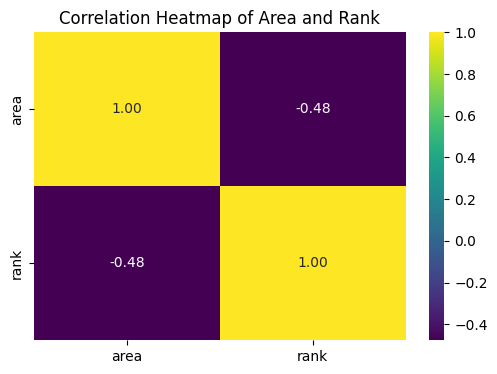

In [ ]:
# Select only numerical columns for the heatmap
numerical_cols = islands[['area', 'rank']]

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Area and Rank')
plt.show()

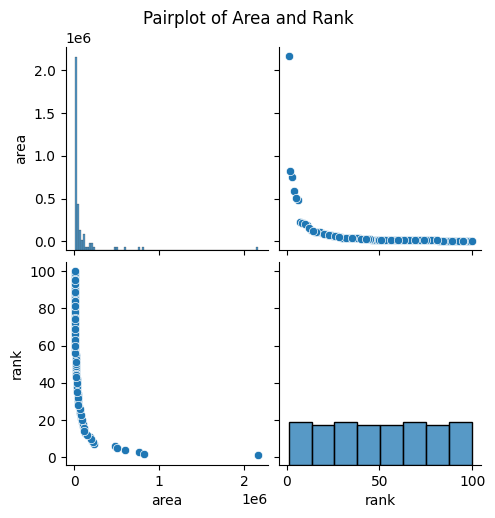

In [ ]:
# Create a pairplot of the numerical columns
sns.pairplot(numerical_cols)
plt.suptitle('Pairplot of Area and Rank', y=1.02)
plt.show()

**Insights observed through this EDA**

* A heatmap is used to visualize the correlation between area and ranks of the islands as that can be observed from the earlier steps and as they are the only numerical columns
* A pairplot is used for visualizing this relationship between the area of the islands and the ranks of the islands.
* Based on the grouped bar chart - Europe has a very large total area, primarily driven by the polar climate.
Asia also has a significant total area, mostly from the tropics climate.
North America shows substantial area in both polar and temperate climates, with a smaller contribution from tropics.
Oceania has considerable area in both tropics and temperate climates.
Africa's area comes entirely from the tropics.
* The bar chart is helpful to visualize the largest islands with their ranks and the top three largest islands are - Greenland, New Guinea , Borneo
* The regions which are populated by the largest islands are Europe, Asia and North America.
* While some regions with large total areas (Europe, Asia, North America) have significant contributions from polar and tropics climates, it's not a simple one-to-one relationship for all regions.
* The distribution of island sizes within each region and climate also plays a role.






